### Mesh info

In [ ]:
import open3d as o3d
import numpy as np

print('===Real dataset===')
mesh = o3d.io.read_triangle_mesh('./Mesh/results/8 frames/jean_ng4.ply')
vertices = np.asarray(mesh.vertices)
print('y axis:')
print(np.amax(vertices[:,1]) - np.amin(vertices[:,1]))
print('x axis:')
print(np.amax(vertices[:,0]) - np.amin(vertices[:,0]))

print('===Make Human===')
mesh = o3d.io.read_triangle_mesh('./Mesh/results/8 frames/ng4.ply')
vertices = np.asarray(mesh.vertices)
print('y axis:')
print(np.amax(vertices[:,1]) - np.amin(vertices[:,1]))
print('x axis:')
print(np.amax(vertices[:,0]) - np.amin(vertices[:,0]))

### Knee area

In [2]:
from plyfile import PlyData
import numpy as np
import curvature as cur

import utilities as uti
import open3d as o3d

## main loop
values_gauss = []
values_mean = []

def initData(plydata):
    cnt = plydata['vertex'].count
    mesh = np.empty((cnt,5))
    mesh[:,0] = plydata['vertex']['x']
    mesh[:,1] = plydata['vertex']['y']
    mesh[:,2] = plydata['vertex']['z']
    mesh[:,3] = plydata['vertex']['quality']
    mesh[:,4] = plydata['vertex']['nz']
    return mesh

for i in range(1,9):
    ## read data
    plydata_gauss = PlyData.read('./Mesh/results/8 frames/ng'+str(i)+'.ply')
    plydata_mean = PlyData.read('./Mesh/results/8 frames/nm'+str(i)+'.ply')
    
    ## init
    mesh_gauss = initData(plydata_gauss)
    mesh_mean = initData(plydata_mean)

    ## remove back
    mesh_gauss = mesh_gauss[np.where(mesh_gauss[:,4] > 0)]
    mesh_mean = mesh_mean[np.where(mesh_mean[:,4] > 0)]

    ## get knee points
    result_gauss = cur.computeKneeAreaCurvature(mesh_gauss[:,:4] ,'sim','gauss','right')
    result_mean = cur.computeKneeAreaCurvature(mesh_mean[:,:4] ,'sim','mean','right')

    # add value
    values_gauss.append(np.average(result_gauss[:,3]))
    values_mean.append(np.average(result_mean[:,3]))

    ## visualization
    result_gauss[:,2] = result_gauss[:,2] + 0.1
    ori = uti.createPointCloud(mesh_gauss[:,:3])
    ori.paint_uniform_color(np.array([0.8,0.8,0.8]))
    re = uti.createPointCloud(result_gauss[:,:3])
    re.paint_uniform_color(np.array([1,0,0]))
    o3d.visualization.draw_geometries([ori,re])

Text(0.5, 1.0, 'Real Dataset Right Knees Avarage')

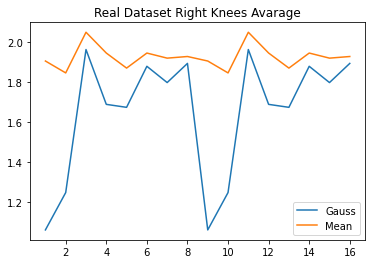

In [3]:
import matplotlib.pyplot as plt

cycle = 2

x = np.arange(1,cycle*8+1,1)
y_gauss = uti.multipleArray(cycle,values_gauss)
y_mean = uti.multipleArray(cycle,values_mean)
plt.plot(x,y_gauss,label='Gauss')
plt.plot(x,y_mean,label='Mean')
plt.legend()
plt.title('Real Dataset Right Knees Avarage')